# DS 3000 - Assignment 7
**Student Name**: Haoyuan Deng

**Date**: 02/20/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

Load the Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data from the URL
url = 'https://drive.google.com/uc?id=1mEewmIvXA57H3upxkqx9vkZfKch9oDsL'
meat_df = pd.read_csv(url)
print(meat_df.head())


  LOCATION    INDICATOR SUBJECT MEASURE FREQUENCY  TIME   Value  Flag Codes
0      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1990   0.000         NaN
1      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1991  27.942         NaN
2      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1992  26.405         NaN
3      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1993  26.370         NaN
4      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1994  25.662         NaN


In [2]:
print(meat_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160 entries, 0 to 12159
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    12160 non-null  object 
 1   INDICATOR   12160 non-null  object 
 2   SUBJECT     12160 non-null  object 
 3   MEASURE     12160 non-null  object 
 4   FREQUENCY   12160 non-null  object 
 5   TIME        12160 non-null  int64  
 6   Value       12160 non-null  float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 760.1+ KB
None


## Question 2: 
Extract the meat consumption data for any three countries of your choice and evaluate the patterns and trends in their meat consumption. You can explore any (2) types of meat (from the chosen countries), and you should only select one unit of measurement**. Ensure that you visualize the data and explain your findings.

In [3]:
# See the unique values in the columns
print(meat_df['LOCATION'].unique())
print(meat_df['SUBJECT'].unique())
print(meat_df['MEASURE'].unique())

['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'ARG' 'BRA' 'CHL' 'CHN'
 'COL' 'EGY' 'ETH' 'IND' 'IDN' 'IRN' 'ISR' 'KAZ' 'MYS' 'NGA' 'PAK' 'PRY'
 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'THA' 'UKR' 'VNM' 'WLD' 'OECD' 'BRICS'
 'NOR' 'CHE' 'GBR']
['BEEF' 'PIG' 'POULTRY' 'SHEEP']
['KG_CAP' 'THND_TONNE']


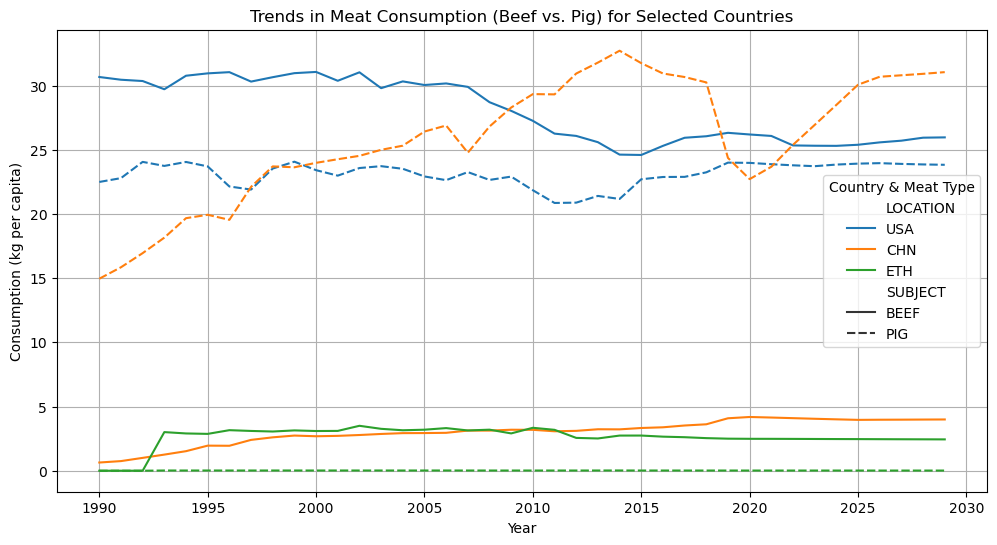

In [4]:
# Filter data for USA, China, and Brazil for beef and poultry
countries = ['USA', 'CHN', 'ETH']
meat_types = ['BEEF', 'PIG']
measure = 'KG_CAP'
filtered_meat_df = meat_df[meat_df['LOCATION'].isin(countries) & meat_df['SUBJECT'].isin(meat_types) & (meat_df['MEASURE'] == measure)]

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_meat_df, x='TIME', y='Value', hue='LOCATION', style='SUBJECT')
plt.xlabel("Year")
plt.ylabel("Consumption (kg per capita)")
plt.title("Trends in Meat Consumption (Beef vs. Pig) for Selected Countries")
plt.legend(title="Country & Meat Type")
plt.grid(True)
plt.show()

In the USA, beef consumption decreases steadily over the years, while pig consumption does not change drastically. In contrast, both beef and pig consumption in China show a consistent increase over time. Meanwhile, in Ethiopia, the consumption of beef and pig remains relatively stable. Pig consumption stays consistent across the years, while beef consumption experiences a slight increase around 1992 but remains unchanged afterward.

## Question 3: 
Extract the poultry consumption data, from 1994 to 2014 (inclusive), for Mexico, that is measured in thousand tonnes of carcass weight**. Note: the filtered dataframe should only contain the time and the values.

In [5]:
mexico_poultry = meat_df[(meat_df['LOCATION'] == 'MEX') & 
                         (meat_df['SUBJECT'] == 'POULTRY') & 
                         (meat_df['MEASURE'] == 'THND_TONNE') & 
                         (meat_df['TIME'] >= 1994) & 
                         (meat_df['TIME'] <= 2014)]
mexico_poultry = mexico_poultry[['TIME', 'Value']]

print(mexico_poultry.round(2))

      TIME    Value
9644  1994  1369.91
9645  1995  1515.52
9646  1996  1505.32
9647  1997  1750.50
9648  1998  1931.27
9649  1999  2080.25
9650  2000  2229.97
9651  2001  2351.66
9652  2002  2516.81
9653  2003  2686.01
9654  2004  2783.34
9655  2005  3029.62
9656  2006  3112.79
9657  2007  3167.94
9658  2008  3261.93
9659  2009  3314.59
9660  2010  3421.16
9661  2011  3532.20
9662  2012  3612.90
9663  2013  3690.32
9664  2014  3801.83


## Question 4:
Summarize the extracted data using descriptive statistics. Explain the statistical summary.
NOTE: this question requires that you evaluate and explain the distribution. Do not simply display the descriptive statistics or say "the maximum values are higher than the average".

In [6]:
summary_stats = mexico_poultry['Value'].describe().round(2)
print(summary_stats)

count      21.00
mean     2698.37
std       783.94
min      1369.91
25%      2080.25
50%      2783.34
75%      3314.59
max      3801.83
Name: Value, dtype: float64


# Brief Summary:
The summary statistics for this variable are as follows: there are 21 observations, with a mean value of 2698.37 and a standard deviation of 783.94. The minimum value is 1369.91, the 25th percentile is 2080.25, the median (50th percentile) is 2783.34, the 75th percentile is 3314.59, and the maximum value is 3801.83. The data shows a range from 1369.91 to 3801.83, indicating variability in the poultry values.

## Question 5:
Visualize the extracted data, using a line chart, and comment on the trend.

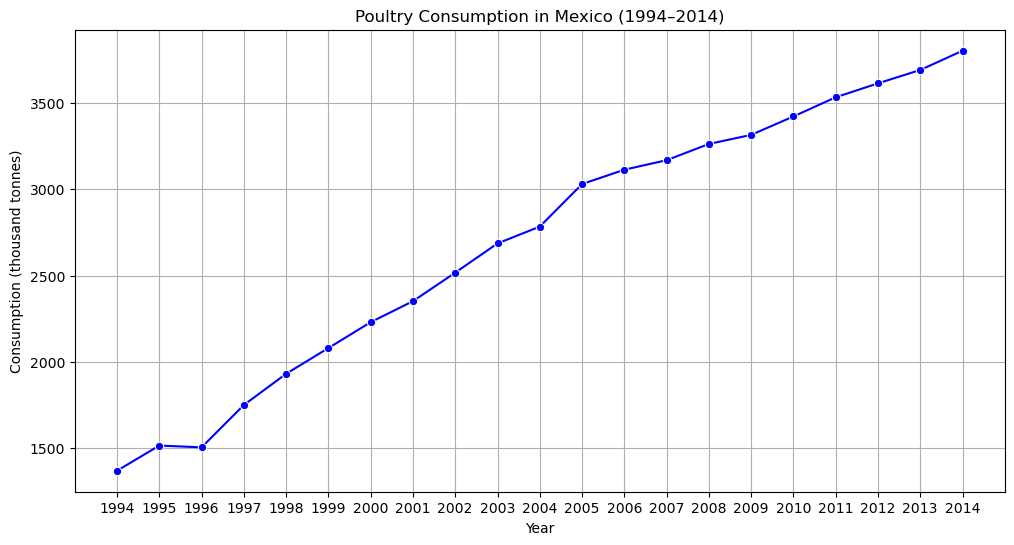

In [7]:
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=mexico_poultry, x="TIME", y="Value", marker='o', color='blue')
plt.title("Poultry Consumption in Mexico (1994–2014)")
plt.xlabel("Year")
plt.xticks(ticks=range(1994, 2015, 1))
plt.ylabel("Consumption (thousand tonnes)")
plt.grid(True)
plt.show()

Consistent Upward Trend: The chart will show a gradual but steady increase in poultry consumption over the 21-year span.

Doubling in Consumption: From roughly 1,370 thousand tonnes in 1994 to over 3800 thousand tonnes by 2014, poultry consumption in Mexico more than doubles.

## Question 6:
Predict poultry consumption from 2015 to 2020 using a simple linear regression model.
1. Ensure that you visualize the original dataset along with the model's predictions.

In [8]:
X = mexico_poultry['TIME'].values.reshape(-1, 1)
y = mexico_poultry['Value'].values

# Fit the model
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Predict for 2015-2020
years_to_predict = np.array([2015, 2016, 2017, 2018, 2019, 2020]).reshape(-1, 1)
predictions = model.predict(years_to_predict)

# Create a DataFrame for the predictions
prediction_df = pd.DataFrame({'TIME': years_to_predict.flatten(), 'Value': predictions})
print(prediction_df.round(2))

   TIME    Value
0  2015  4076.21
1  2016  4201.46
2  2017  4326.72
3  2018  4451.98
4  2019  4577.24
5  2020  4702.49


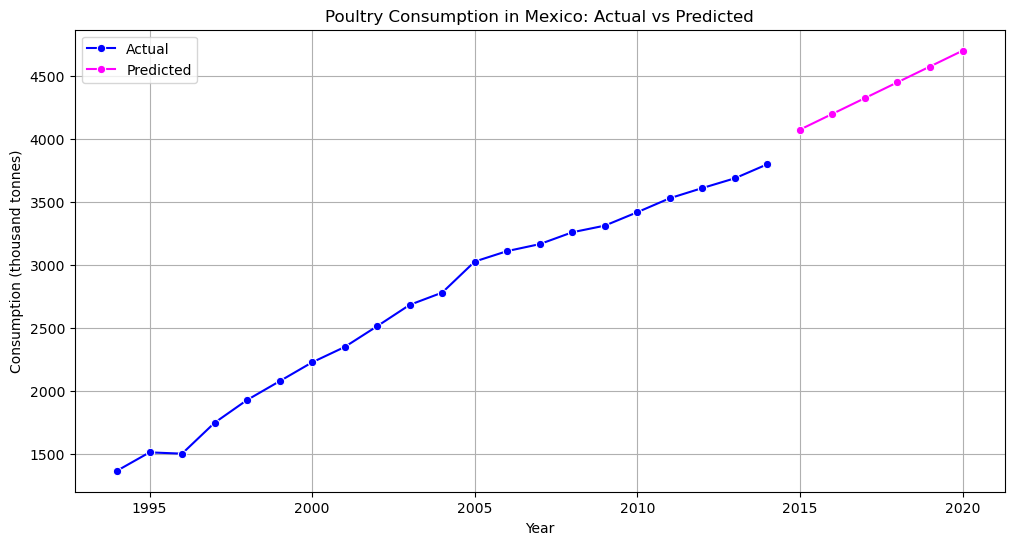

In [9]:
# Visualize the original data and predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=mexico_poultry, x="TIME", y="Value", marker='o', color='blue', label='Actual')
sns.lineplot(data=prediction_df, x="TIME", y="Value", marker='o', color='magenta', label='Predicted')
plt.title('Poultry Consumption in Mexico: Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('Consumption (thousand tonnes)')
plt.legend()
plt.grid(True)
plt.show()

2. Evaluate the model's predictions against the actual consumption data from 2015 to 2020 and discuss its performance.

In [10]:
# Evaluate the model's predictions against actual data
actual_data = meat_df[(meat_df['LOCATION'] == 'MEX') & 
                             (meat_df['SUBJECT'] == 'POULTRY') & 
                             (meat_df['MEASURE'] == 'THND_TONNE') & 
                             (meat_df['TIME'] >= 2015) & 
                             (meat_df['TIME'] <= 2020)]
actual_values = actual_data['Value'].values

# Compare predictions with actual values
comparison_df = pd.DataFrame({'Year': years_to_predict.flatten(), 'Predicted': predictions, 'Actual': actual_values})
comparison_df['Difference'] = comparison_df['Predicted'] - comparison_df['Actual'] 
comparison_df['% Difference'] = (comparison_df['Difference'] / comparison_df['Actual']) * 100
print(comparison_df.round(2))

   Year  Predicted   Actual  Difference  % Difference
0  2015    4076.21  3928.08      148.12          3.77
1  2016    4201.46  4073.14      128.33          3.15
2  2017    4326.72  4223.31      103.41          2.45
3  2018    4451.98  4316.46      135.52          3.14
4  2019    4577.24  4426.51      150.73          3.41
5  2020    4702.49  4481.28      221.22          4.94


The predicted values are close to the actual values with the % difference is less than 10% for all the years.

## Question 7: 
Calculate the R-squared and explain what this tells you about the model.

In [11]:
r_squared = r2_score(actual_values, predictions)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.38


# Explanation of R-squared:
The R-squared value indicates the proportion of the variance in the dependent variable that is predictable from the independent variable. A higher R-squared value suggests a better fit of the model to the data.

## Question 8: 
This is a challenge question that may require some research.
residuals: Visualize the residuals of the regression model in question 6 and explain the chart.
Note: A residual is the difference between the actual and predicted values.

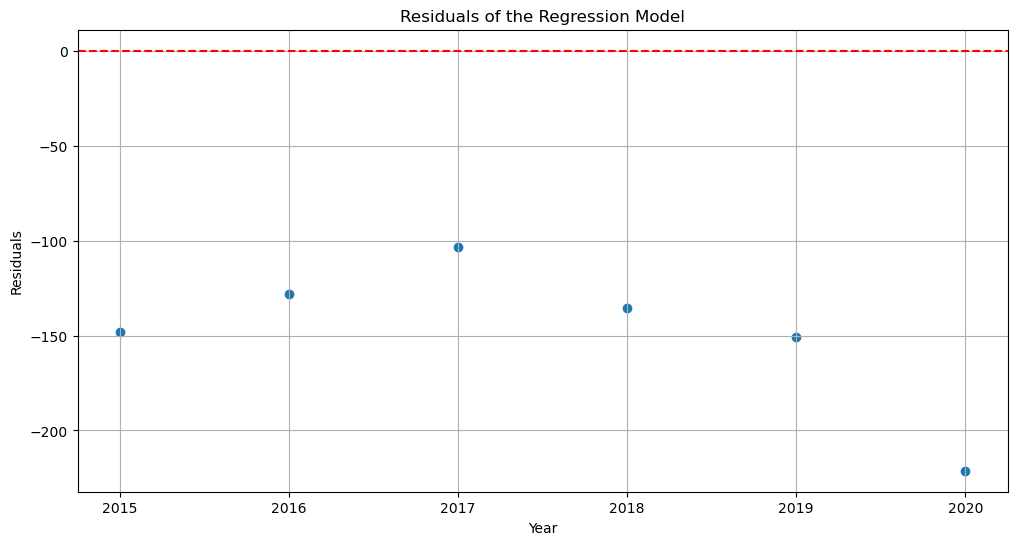

In [12]:
# Visualize the residuals
residuals = actual_values - predictions
plt.figure(figsize=(12, 6))
plt.scatter(years_to_predict, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of the Regression Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Explanation of the residuals chart
The residuals plot shows the differences between the actual and predicted values.
Ideally, residuals should be randomly distributed around the horizontal axis, indicating a good fit.
Any patterns or trends in the residuals may suggest that the model is not capturing some aspects of the data.